<h2 style='color:blue' align='center'>Data Augmentation To Address Overfitting In Flower Classification CNN</h2>

**In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc**

Credits: I used tensorflow offical tutorial: https://www.tensorflow.org/tutorials/images/classification as a reference and made bunch of changes to make it simpler

In below image, 4 new training samples are generated from original sample using different transformations

<img src="daisy2.JPG" />

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# pip install opencv-python

     |████████████████████████████████| 52.4 MB 215 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import PIL

We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

<h3 style='color:purple'>Load flowers dataset</h3>

In [7]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir="/Users/yogesh/Documents/Bharadwaj's/Career/Data Science/Datasets", untar=True)

# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228818944/228813984 [==============================] - 296s 1us/step


In [8]:
data_dir

"/Users/yogesh/Documents/Bharadwaj's/Career/Data Science/Datasets/datasets/flower_photos"

In [9]:
import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

PosixPath("/Users/yogesh/Documents/Bharadwaj's/Career/Data Science/Datasets/datasets/flower_photos")

In [10]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath("/Users/yogesh/Documents/Bharadwaj's/Career/Data Science/Datasets/datasets/flower_photos/roses/16209331331_343c899d38.jpg"),
 PosixPath("/Users/yogesh/Documents/Bharadwaj's/Career/Data Science/Datasets/datasets/flower_photos/roses/5777669976_a205f61e5b.jpg"),
 PosixPath("/Users/yogesh/Documents/Bharadwaj's/Career/Data Science/Datasets/datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg"),
 PosixPath("/Users/yogesh/Documents/Bharadwaj's/Career/Data Science/Datasets/datasets/flower_photos/roses/15011625580_7974c44bce.jpg"),
 PosixPath("/Users/yogesh/Documents/Bharadwaj's/Career/Data Science/Datasets/datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg")]

In [11]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [12]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath("/Users/yogesh/Documents/Bharadwaj's/Career/Data Science/Datasets/datasets/flower_photos/roses/16209331331_343c899d38.jpg"),
 PosixPath("/Users/yogesh/Documents/Bharadwaj's/Career/Data Science/Datasets/datasets/flower_photos/roses/5777669976_a205f61e5b.jpg"),
 PosixPath("/Users/yogesh/Documents/Bharadwaj's/Career/Data Science/Datasets/datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg"),
 PosixPath("/Users/yogesh/Documents/Bharadwaj's/Career/Data Science/Datasets/datasets/flower_photos/roses/15011625580_7974c44bce.jpg"),
 PosixPath("/Users/yogesh/Documents/Bharadwaj's/Career/Data Science/Datasets/datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg")]

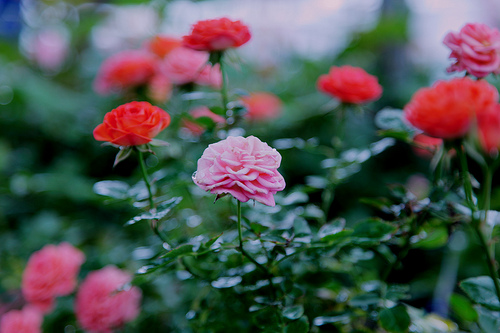

In [13]:
PIL.Image.open(str(roses[1]))

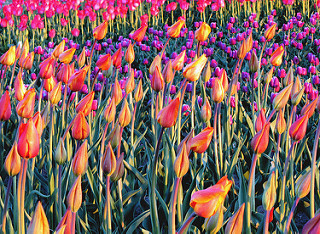

In [14]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

<h3 style='color:purple'>Read flowers images from disk into numpy array using opencv</h3>

In [15]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [16]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [17]:
flowers_images_dict['roses'][:5]

[PosixPath("/Users/yogesh/Documents/Bharadwaj's/Career/Data Science/Datasets/datasets/flower_photos/roses/16209331331_343c899d38.jpg"),
 PosixPath("/Users/yogesh/Documents/Bharadwaj's/Career/Data Science/Datasets/datasets/flower_photos/roses/5777669976_a205f61e5b.jpg"),
 PosixPath("/Users/yogesh/Documents/Bharadwaj's/Career/Data Science/Datasets/datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg"),
 PosixPath("/Users/yogesh/Documents/Bharadwaj's/Career/Data Science/Datasets/datasets/flower_photos/roses/15011625580_7974c44bce.jpg"),
 PosixPath("/Users/yogesh/Documents/Bharadwaj's/Career/Data Science/Datasets/datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg")]

In [18]:
str(flowers_images_dict['roses'][0])

"/Users/yogesh/Documents/Bharadwaj's/Career/Data Science/Datasets/datasets/flower_photos/roses/16209331331_343c899d38.jpg"

In [19]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [20]:
img.shape

(243, 500, 3)

In [21]:
cv2.resize(img,(180,180)).shape  # images were of diff sizes so we need to resize into same size. 

(180, 180, 3)

In [22]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [24]:
X = np.array(X)
y = np.array(y)

<h3 style='color:purple'>Train test split</h3>

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<h3 style='color:purple'>Preprocessing: scale images</h3>

In [26]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

<h3 style='color:purple'>Build convolutional neural network and train it</h3>

In [27]:
num_classes = 5 # bcoz we have 5 diff type of flowers i.e classification

model = Sequential([
    
  layers.Conv2D(16, 3, padding='same', activation='relu'),  # here 16 is number of filters. 
  layers.MaxPooling2D(),
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes) 
    
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)              

Epoch 1/30
86/86 [==============================] - 27s 295ms/step - loss: 1.4838 - accuracy: 0.3675
Epoch 2/30
86/86 [==============================] - 25s 293ms/step - loss: 0.9589 - accuracy: 0.6334
Epoch 3/30
86/86 [==============================] - 25s 293ms/step - loss: 0.7488 - accuracy: 0.7177
Epoch 4/30
86/86 [==============================] - 26s 299ms/step - loss: 0.5348 - accuracy: 0.8079
Epoch 5/30
86/86 [==============================] - 26s 298ms/step - loss: 0.3218 - accuracy: 0.8984
Epoch 6/30
86/86 [==============================] - 25s 287ms/step - loss: 0.1934 - accuracy: 0.9375
Epoch 7/30
86/86 [==============================] - 25s 296ms/step - loss: 0.0910 - accuracy: 0.9778
Epoch 8/30
86/86 [==============================] - 25s 293ms/step - loss: 0.0441 - accuracy: 0.9882
Epoch 9/30
86/86 [==============================] - 25s 293ms/step - loss: 0.0358 - accuracy: 0.9891
Epoch 10/30
86/86 [==============================] - 25s 288ms/step - loss: 0.0195 - accura

In [28]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 3s 70ms/step - loss: 2.9163 - accuracy: 0.6765


[2.9163014888763428, 0.6764705777168274]

**Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

In [29]:
predictions = model.predict(X_test_scaled)
predictions

array([[  2.3887877 ,  11.311589  ,   4.625651  ,  -8.491954  ,
         -9.46642   ],
       [ 11.949629  ,  -0.16217864, -12.843034  ,  -7.4684963 ,
         -1.9607813 ],
       [  3.3389535 ,  -5.4676666 ,   7.7713804 ,  -1.435554  ,
         -6.0821033 ],
       ...,
       [ -9.023878  ,  -1.2547761 ,   4.38917   ,  21.667742  ,
         -8.814345  ],
       [  7.3191943 ,  -2.7445402 ,  -5.611774  ,  -7.121957  ,
          0.86078304],
       [ -4.5144696 , -21.039673  ,   9.917987  ,  34.41066   ,
         -2.9882655 ]], dtype=float32)

In [30]:
score = tf.nn.softmax(predictions[0]) 

# In the final dense function above we didn't specify the activation function
# hence by default it took the linear activation hence the predictions above are not normalized between 0 and 1
# if we take max of this unnormalized output it would go wrong, hence we are passing that result to softmax to 
# normalize it. Another option is while invoking the model itself in Dense function we can specific activation 
# function as softmax to avoid this extra step.

In [31]:
np.argmax(score) # i.e prediction flower label is 1 i.e daisy flower 

1

In [32]:
y_test[0] # in test also its daisy, so its matching. 

1

<h3 style='color:purple'>Improve Test Accuracy Using Data Augmentation</h3>

**Original Image**

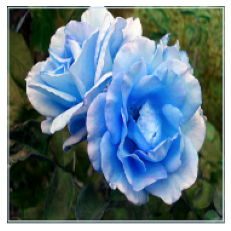

In [39]:
plt.axis('off')
plt.imshow(X[2])

In [50]:
# Zoom function

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomZoom(-0.8),
  ]
)

**Newly generated training sample using data augmentation**

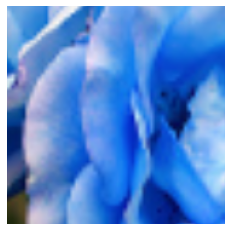

In [51]:
plt.axis('off')
plt.imshow(data_augmentation(X)[2].numpy().astype("uint8"))

In [57]:
# Rotation function

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomRotation(1)
  ]
)

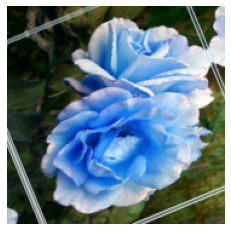

In [58]:
plt.axis('off')
plt.imshow(data_augmentation(X)[2].numpy().astype("uint8"))

# it has rotated

In [59]:
img_height = 180
img_width = 180

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
  ]
)

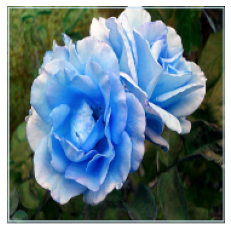

In [60]:
plt.axis('off')
plt.imshow(data_augmentation(X)[2].numpy().astype("uint8"))

# flower got flipped to left side. Original flower is on right side... Awesome...

In [62]:
# Now we combine all 3

img_height = 180
img_width = 180

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

<h3 style='color:purple'>Train the model using data augmentation and a drop out layer</h3>

In [63]:
num_classes = 5

model = Sequential([
    
  data_augmentation,
    
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Dropout(0.2), # to drop 20% of neurons in random to achieve more generalization
    
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
    
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 [==============================] - 28s 313ms/step - loss: 1.5331 - accuracy: 0.3368
Epoch 2/30
86/86 [==============================] - 28s 330ms/step - loss: 1.1090 - accuracy: 0.5765
Epoch 3/30
86/86 [==============================] - 29s 341ms/step - loss: 0.9828 - accuracy: 0.6192
Epoch 4/30
86/86 [==============================] - 28s 328ms/step - loss: 0.9083 - accuracy: 0.6549
Epoch 5/30
86/86 [==============================] - 29s 332ms/step - loss: 0.8517 - accuracy: 0.6841
Epoch 6/30
86/86 [==============================] - 31s 358ms/step - loss: 0.7786 - accuracy: 0.7075
Epoch 7/30
86/86 [==============================] - 30s 353ms/step - loss: 0.7732 - accuracy: 0.7023
Epoch 8/30
86/86 [==============================] - 29s 336ms/step - loss: 0.7065 - accuracy: 0.7257
Epoch 9/30
86/86 [==============================] - 32s 374ms/step - loss: 0.7056 - accuracy: 0.7247
Epoch 10/30
86/86 [==============================] - 30s 353ms/step - loss: 0.6588 - accura

In [64]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 3s 77ms/step - loss: 0.9256 - accuracy: 0.7342


[0.9255975484848022, 0.7342047691345215]

**You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.42%**

In [65]:
predictions = model.predict(X_test_scaled)
predictions  # as we had used softmax above, the values are normalized between 0 and 1. 

array([[1.60009324e-04, 9.87745464e-01, 1.11000035e-02, 1.08099960e-06,
        9.93451336e-04],
       [9.98820007e-01, 7.40747317e-04, 4.86966792e-06, 6.06368631e-05,
        3.73722549e-04],
       [1.05210438e-05, 3.90296018e-10, 9.99637961e-01, 7.97684515e-06,
        3.43528547e-04],
       ...,
       [1.45703438e-09, 3.92211803e-07, 1.71565253e-03, 9.98281121e-01,
        2.83377472e-06],
       [9.92680192e-01, 2.02492229e-03, 8.07704637e-05, 7.42432239e-05,
        5.13986405e-03],
       [1.71854193e-14, 3.59499603e-16, 1.31040156e-06, 9.99998569e-01,
        9.74080265e-08]], dtype=float32)

In [66]:
np.argmax(score) # i.e prediction flower label is 1 i.e daisy flower 

1

In [67]:
y_test[0] # in test also its daisy, so its matching. 

1

In [ ]:
# Awesome !!!